In [1]:
# %reset

# Library imports

In [2]:
import re
import random

import tabula
from tqdm import tqdm
from Bio import Entrez, SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.patches as mpatches
from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import pyplot as plt

%matplotlib inline

# Data import and Data analysis

In [3]:
# Genbank ID: MN908947.3
ref_seq = "ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTTCTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"

len(ref_seq)

29903

In [4]:
Entrez.email = "vermaakhilkr01@gmail.com"

In [5]:
# For SARS-CoV-2, MN908947.3 was used instead of NC_045512.2
idlist = [
    "MN908947.3",
    "NC_006577.2",
    "NC_005147.1",
    "NC_038294.1",
    "NC_019843.3",
    "NC_004718.3",
    "NC_009021.1",
    "NC_028909.1",
    "OM009282.1",
    "NC_009019.1",
    "MN996532.2",
    "KF367457.1",
    "NC_030886.1",
    "NC_025217.1",
]

In [6]:
# Saving .gb file
handle = Entrez.efetch(db="nucleotide", id=idlist, rettype="gb")
records = SeqIO.parse(handle, "gb")
output_filepath = "../seq_data_files/coronaviruses_checkfile.gb"
SeqIO.write(records, output_filepath, "gb")

14

In [7]:
# Saving .fasta file
handle = Entrez.efetch(db="nucleotide", id=idlist, rettype="fasta")
records = SeqIO.parse(handle, "fasta")
output_filepath = "../seq_data_files/coronaviruses_checkfile.fasta"
SeqIO.write(records, output_filepath, "fasta")

14

In [8]:
handle = Entrez.efetch(db="nucleotide", id=idlist, rettype="fasta")
records = SeqIO.parse(handle, "fasta")

records = [record for record in records]

for record in records:
    print(record.description)

MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
NC_006577.2 Human coronavirus HKU1, complete genome
NC_005147.1 Human coronavirus OC43, complete genome
NC_038294.1 Betacoronavirus England 1 isolate H123990006, complete genome
NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome
NC_004718.3 SARS coronavirus Tor2, complete genome
NC_009021.1 Rousettus bat coronavirus HKU9, complete genome
NC_028909.1 BtPa-BetaCoV/GD2013, complete genome
OM009282.1 Pangolin coronavirus HKU4/P251T/pangolin/2018, complete genome
NC_009019.1 Tylonycteris bat coronavirus HKU4, complete genome
MN996532.2 Bat coronavirus RaTG13, complete genome
KF367457.1 Bat SARS-like coronavirus WIV1, complete genome
NC_030886.1 Rousettus bat coronavirus isolate GCCDC1 356, complete genome
NC_025217.1 Bat Hp-betacoronavirus/Zhejiang2013, complete genome


## Multiple Sequence Alignment, MSA (using MAFFT v7.490)

Each sequence is individually aligned to the reference GenBank: $MN908947.3$.

For detailed explanation on method to generate MSA and parameters used, read _METHOD_for_generating_msa.txt_ in $../msa$ directory.

In [9]:
# !mafft --thread -1 ../seq_data_files/coronaviruses_checkfile.fasta > ../msa/cxoronaviruses_checkfile.fasta

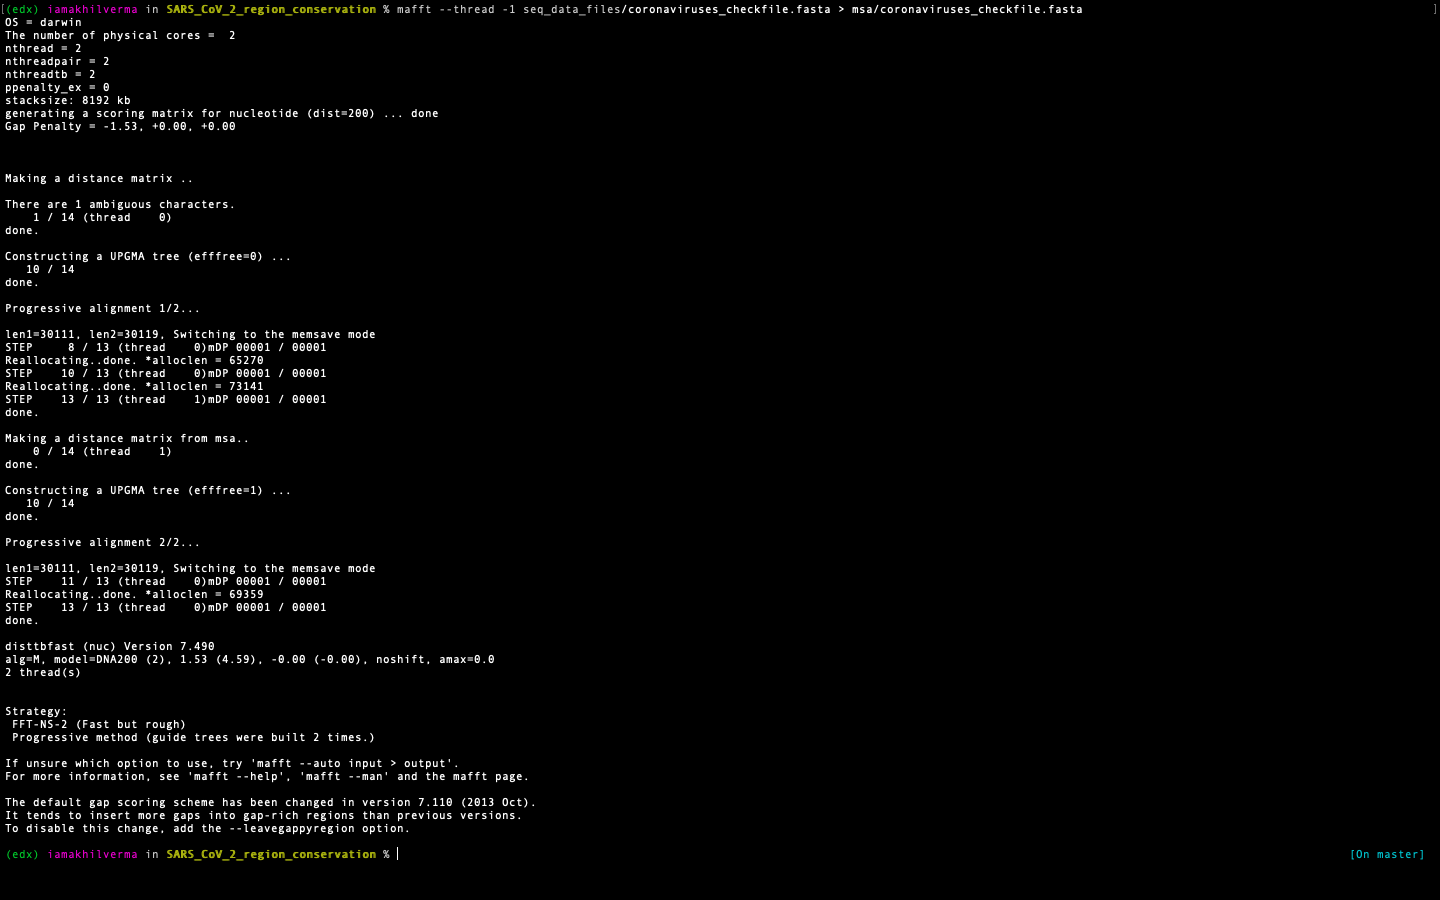

In [10]:
# Convert aligned seq chars from lower case to upper case
aln_records = (
    rec.upper()
    for rec in SeqIO.parse("../msa/coronaviruses_checkfile.fasta", format="fasta")
)
aln_count = SeqIO.write(
    aln_records, "../msa/coronaviruses_checkfile_alignment.fasta", format="fasta"
)
print(f"Converted {aln_count} records to upper case")

Converted 14 records to upper case


In [11]:
alignment = AlignIO.read(
    "../msa/coronaviruses_checkfile_alignment.fasta", format="fasta"
)

In [12]:
print(alignment)

Alignment with 14 rows and 40728 columns
ATTAAAGGTTTATACCTTCC------------------------...--- MN908947.3
-----GAGTTTGAGCGATTGACGTTCGTACCGTC-----TATCA...--- NC_006577.2
-----GATTGTGAGCGATTTGCGTGCGTGCATCC-----CGCT-...--- NC_005147.1
-------ATTTAAGTGAATAGCTTGGCTATCTCA-----CTTCC...--- NC_038294.1
------GATTTAAGTGAATAGCTTGGCTATCTCA-----CTTCC...--- NC_019843.3
ATATTAGGTTTTTACCTACC------------------------...--- NC_004718.3
------GATAAAAGGTAGTAGC-TGCGTGCTATCGCCGATCCTA...--- NC_009021.1
------GATTTAAGAGAATAGCCTAGCTATCC-------CTCTC...--- NC_028909.1
-------CTTTTCATGTGCCTGTTGGCCATGTGA-----ATTTC...AAC OM009282.1
------GATTTAAGTGAATAGCCTAGCTATCTCA-----CCCCC...--- NC_009019.1
ATTAAAGGTTTATACCTTTC------------------------...--- MN996532.2
ATATTAGGTTTTTACCTACC------------------------...--- KF367457.1
---GAAAATAAAAAGTAATTGCGTGCGTGCAATCAAC--TTTTC...--- NC_030886.1
---TTAAGCTTCGGCTTGTTGCATAGG-----------------...--- NC_025217.1


## Generate mapping

_generate_mapping.py_ was used to generate mapping between pre-alignment reference sequence positions and post-alignment reference sequence positions.

In [13]:
# Preparing input file for generate_mapping.py
with open("../seq_data_files/prepost_sars_cov2_ref_seq.fasta", "w") as file:
    for record in records:
        if record.id == "MN908947.3":
            file.writelines(f"{record.description}\n")
            file.write(f"{str(record.seq)}\n")
    for aln in alignment:
        if aln.id == "MN908947.3":
            file.write(f"{aln.description}\n")
            file.write(f"{str(aln.seq)}")

In [14]:
!python generate_mapping.py

In [15]:
df_mapping = pd.read_excel("../other_data_files/mapping.xlsx")
df_mapping

,aligned_seq,aligned_number,pre_aligned_number
0,A,1,1
1,T,2,2
2,T,3,3
3,A,4,4
4,A,5,5
...,...,...,...
40723,-,40724,"Ins: 29903, pa: 40724"
40724,-,40725,"Ins: 29903, pa: 40725"
40725,-,40726,"Ins: 29903, pa: 40726"
40726,-,40727,"Ins: 29903, pa: 40727"


## Analysis (contd.)

In [16]:
df_table_02 = pd.read_excel("../Supplementary_files/Table_01.xlsx")
df_table_02

,Conserved stretches' serial number,Nucleotide start position,Nucleotide end position,Conserved stretch length,Gene
0,Conserved stretch 01,937,1047,111,ORF1ab
1,Conserved stretch 02,8394,8511,118,ORF1ab
2,Conserved stretch 03,12163,12356,194,ORF1ab
3,Conserved stretch 04,12535,12650,116,ORF1ab
4,Conserved stretch 05,13357,13457,101,ORF1ab
5,Conserved stretch 06,16751,16851,101,ORF1ab
6,Conserved stretch 07,17851,17963,113,ORF1ab
7,Conserved stretch 08,19399,19523,125,ORF1ab
8,Conserved stretch 09,24209,24333,125,S
9,Conserved stretch 10,24643,24744,102,S


In [17]:
conserved_stretch_info_list = []

for row in df_table_02.itertuples():
    m_i = int(df_mapping.query(f"pre_aligned_number == {row._2}").aligned_number)
    m_f = int(df_mapping.query(f"pre_aligned_number == {row._3}").aligned_number)
    conserved_stretch_info_list.append((m_i, m_f, f"CS{row.Index+1:02}"))

print(conserved_stretch_info_list)

[(1314, 1452, 'CS01'), (11059, 11176, 'CS02'), (15019, 15215, 'CS03'), (15394, 15514, 'CS04'), (16233, 16336, 'CS05'), (19639, 19739, 'CS06'), (20745, 20857, 'CS07'), (22334, 22458, 'CS08'), (30552, 30676, 'CS09'), (30986, 31087, 'CS10'), (34227, 34328, 'CS11')]


In [18]:
flag = False
instances = []
for record in alignment:
    if flag:
        break
    for x_i, x_f, _ in conserved_stretch_info_list:
        instances.append(str(record.seq[x_i - 1 : x_f]))
    flag = True

print(instances)

['TAAGAGGGGTGTATACTGCTGCCGTGAACATGA----------------------------GCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAA', 'CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACA', 'GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGA', 'TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTA-----AAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAA', 'ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAA---CCCATGCTTCAGTCAGCTGATGCACAAT', 'CTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTAT', 'TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAAT', 'TCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTT

In [19]:
# Checks in-place
for row in df_table_02.itertuples():
    print(instances[row.Index].replace("-", "") == ref_seq[row._2 - 1 : row._3])

True
True
True
True
True
True
True
True
True
True
True


In [20]:
data_dict = {}

for x_i, x_f, key in conserved_stretch_info_list:
    temp = []
    for record in alignment:
        temp.append(str(record.seq[x_i - 1 : x_f]))
    data_dict[key] = temp

print(data_dict)

{'CS01': ['TAAGAGGGGTGTATACTGCTGCCGTGAACATGA----------------------------GCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAA', 'TGATATTGTAGTGGCTTGGCATGTAGTTCGTGATTCACGATTTGTTATGCGCCTGCAGACTATAGC-TACTATTTGTGGTATTAAATATG------------------------TTGCACAACCTACAGAAGATGTAGT', 'TGATGTAATTGTGGCATGGCATGTTGTGCGTGATCCACGTTATGTTATGAGATTGCAGAGTGCTGC-TACTATACGTAGTGTTGCATATG------------------------TTGCTAATCCTACTGAAGACTTGTG', 'TGAAGCGGACGTCGCAGCACGTGCTGATGACGA-AGGCTTCATCACATTAAAGAACAATCTATATAGATTGGTTTGGCATGTTGAGCGTAAAGACGTTCCATATCCTAAGCAATCTATTTTTACTATTAATAGTGTGGT', 'TGAAGCGGACGTCGCAGCACGTGCTGATGACGA-AGGCTTCATCACATTAAAGAACAATCTATATAGATTGGTTTGGCATGTTGAGCGTAAAGACGTTCCATATCCTAAGCAATCTATTTTTACTATTAATAGTGTGGT', 'GAAGAGAGGTGTCTACTGCTGCCGTGACCATGA----------------------------GCATGAAATTGCCTGGTTCACTGAGCGCTCTGATAAGAGCTACGAGCACCAGACACCCTTCGAAATTAAGAGTGCCAA', '---------------------AGATGGATACGATTTGCCTGATGGTTACGTAAA-------------GGTTGCTATTAAGGTGGGTCGTAAAGCTGTGCCTGTTTTGAAGCAGTCAATTTTTACTGTTGTA

In [21]:
d = {
    "seq_id": [record.id for record in alignment],
    "seq_description": [record.description for record in alignment],
}

for i in range(len(conserved_stretch_info_list)):
    d[f"conserved_stretch_{i+1:02}"] = data_dict[f"CS{i+1:02}"]

df = pd.DataFrame(d)

In [22]:
ref_conserved_stretch_dict = {name: values[0] for name, values in df.iteritems()}
# del ref_conserved_stretch_dict['seq_id']
ref_conserved_stretch_dict

{'seq_id': 'MN908947.3',
 'seq_description': 'MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome',
 'conserved_stretch_01': 'TAAGAGGGGTGTATACTGCTGCCGTGAACATGA----------------------------GCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAA',
 'conserved_stretch_02': 'CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACA',
 'conserved_stretch_03': 'GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGA',
 'conserved_stretch_04': 'TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTA-----AAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAA',
 'conserved_stretch_05': 'ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAA---CCCATGCTTCAGTCAGCTGATGCACAAT',
 'conserved_stretch_06': 'CTAGACC

In [23]:
df

,seq_id,seq_description,conserved_stretch_01,conserved_stretch_02,conserved_stretch_03,conserved_stretch_04,conserved_stretch_05,conserved_stretch_06,conserved_stretch_07,conserved_stretch_08,conserved_stretch_09,conserved_stretch_10,conserved_stretch_11
0,MN908947.3,MN908947.3 Severe acute respiratory syndrome c...,TAAGAGGGGTGTATACTGCTGCCGTGAACATGA-------------...,CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACT...,GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTG...,TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGAT...,ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTAT...,CTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGT...,TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTC...,TCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAA...,ACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCAT...,TAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTT...,GTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGAT...
1,NC_006577.2,"NC_006577.2 Human coronavirus HKU1, complete g...",TGATATTGTAGTGGCTTGGCATGTAGTTCGTGATTCACGATTTGTT...,CTTGTATATGGTTTATTGATGCTTTTAATCAACTTACTGCTGATTT...,TGCTAAAAATAGTGGTTCTGTTAATCAACAACAGATAAAACAGTTA...,ATATGCTGGTAGTGTATGGCATATACAGACTGTTCAAGATGCTGAT...,GTTAACACATGATGTTTGTCAAGTCTGTGGTTTTTGGAGAGATGGC...,TTAAACCACCACTTAATAAAAATTATGTTTTCACAGGCTACCATTT...,TCGGAATATGATTATGTTATATATTCACAAACAGCAGAAACAGCCC...,TACGTAGATGGTTTAGAATCTAAACAAGTTGATTACGTTCCTTTAA...,GTTGCTGCTATGTTTCCACCATGGTCAGCAGCAGCTGGCATACCAT...,GAAGGTTAATGAGTGTGTTAAAAGTCAATCTCCTCGTATTAATTTT...,GTTGTTGCTTTTTTAG------------------CAACTATTAAGC...
2,NC_005147.1,"NC_005147.1 Human coronavirus OC43, complete g...",TGATGTAATTGTGGCATGGCATGTTGTGCGTGATCCACGTTATGTT...,CCTGTATATGGTCTGTGGATGCTTTTAATCAGTTTAGTTCTGATTT...,GGCGCGTTTTAGTGGTTCTGCTAATCAACAGCAGTTAAAACAGCTA...,CTATGCGGGTAATGTATGGCAGATTCAAACTATCCAGGATTCAGAT...,TTTGACACATGATGTTTGTCGAGTTTGTGGATTTTGGCGGGATGGA...,TTAAGCCACCACTTAATAAAAATTATGTTTTTACTGGCTACCATTT...,TCTGAATATGATTATGTTATATATTCACAGACTGCAGAAACAGCGC...,TATATGGATGGCATGGATGCTAAGCAGGTTGATTATGTACCTTTGA...,TCTGCTAGTCTATTTCCTCTTTGGACAGCAGCAGCAGGTGTACCAT...,GAAGGTTAATGAATGTGTCAAAAGCCAATCATCTAGGATAAATTTC...,GTAGTGGCATTTTTGG------------------CAACTTTTAAAT...
3,NC_038294.1,NC_038294.1 Betacoronavirus England 1 isolate ...,TGAAGCGGACGTCGCAGCACGTGCTGATGACGA-AGGCTTCATCAC...,CTTGTATTTGGAACGCTGCTGCATATATGAAACTCTCGGATGCACT...,AGCTATGGACTCTGGTGACACCTCACCACAAGTTCTTAAGGCTTTG...,CTACGCTGGGGCTTTGTGGGACATTACAGTTATAAACAATGTGGAC...,TTTGTCAAATACCCCCTGTAATGTCTGTCAATATTGGATTGGATAT...,CCAAACCACCACTCAATCGTAATTATGTTTTTACTGGTTATCATAT...,TCAGAATACCAGTACGTTATCTTCTGTCAAACAGCAGATACGGCAC...,CATGGTAATGGTAGTATGATAGAGGATATTGATTATGTACCCCTAA...,GGTGTTGGCTGGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCAT...,TAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTT...,GCTATAACACTCTTGGTGTGTATGGCTTTCCTTACGGCTACTAGAT...
4,NC_019843.3,NC_019843.3 Middle East respiratory syndrome-r...,TGAAGCGGACGTCGCAGCACGTGCTGATGACGA-AGGCTTCATCAC...,CTTGCATTTGGAACGCTGCTGCATATATGAAACTCTCGGATGCACT...,AGCTATGGACTCTGGTGACACCTCACCACAAGTTCTTAAGGCTTTG...,CTACGCTGGGGCTTTGTGGGACATTACAGTTATAAACAATGTGGAC...,TTTGTCAAATACCCCCTGTAATGTCTGTCAATATTGGATTGGATAT...,CCAAACCACCACTCAATCGTAATTATGTTTTTACTGGTTATCATAT...,TCAGAATACCAGTACGTTATCTTCTGTCAAACAGCAGATACGGCAC...,CATGGTAATGGTAGTATGATAGAGGATATTGATTATGTACCCCTAA...,GGTGTTGGCTGGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCAT...,TAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTT...,GCTATAACACTCTTGGTGTGTATGGCTTTCCTTACGGCTACTAGAT...
5,NC_004718.3,"NC_004718.3 SARS coronavirus Tor2, complete ge...",GAAGAGAGGTGTCTACTGCTGCCGTGACCATGA-------------...,CACTCATCTGGAATGTAAAAGACTACATGTCTTTATCTGAACAGCT...,GGCTGTAGCTAATGGTGATTCTGAAGT---CGTTCTCAAAAAGTTA...,ATATGCATCTGCACTCTGGGAAATCCAGCAAGTTGTTGATGCGGAT...,ACTTAGAAACACAGTCTGTACCGTCTGCGGAATGTGGAAAGGTTAT...,CTAGACCACCATTGAACAGAAACTATGTCTTTACTGGTTACCGTGT...,TCTGAATATGACTATGTCATATTCACACAAACTACTGAAACAGCAC...,TCTCATGGCAAACAAGTAGTGTCGGATATTGATTATGTTCCACTCA...,ACTGCTGGATGGACATTTGGTGCTGGCGCTGCTCTTCAAATACCTT...,TAAAATGTCTGAGTGTGTTCTTGGACAATCAAAAAGAGTTGACTTT...,GTGGTATTCTTGCTAGTCACACTAGCCATCCTTACTGCGCTTCGAT...
6,NC_009021.1,"NC_009021.1 Rousettus bat coronavirus HKU

In [24]:
for i in range(len(conserved_stretch_info_list)):
    df[f"match_score_for_conserved_stretch_{i+1:02}"] = 100


def get_match_score(seq1, seq2):
    """Returns the match score of two given sequences 
    by doing a nt-base by nt-base comparison
    seq1: ref seq
    seq2: seq to compare with ref seq
    Ideally, seq1 and seq2 should be strings
    """
    match_count = 0
    for nt_in_1, nt_in_2 in zip(seq1, seq2):
        if nt_in_1 == nt_in_2:
            match_count += 1
    return 100 * (match_count / len(seq1))


for row in df.iloc[1:,].itertuples():
    j = 1
    for i in range(3, 3 + len(conserved_stretch_info_list)):
        df.at[row.Index, f"match_score_for_conserved_stretch_{j:02}"] = get_match_score(
            ref_conserved_stretch_dict[f"conserved_stretch_{j:02}"], row[i]
        )
        j += 1

In [25]:
print(df)

         seq_id                                    seq_description  \
0    MN908947.3  MN908947.3 Severe acute respiratory syndrome c...   
1   NC_006577.2  NC_006577.2 Human coronavirus HKU1, complete g...   
2   NC_005147.1  NC_005147.1 Human coronavirus OC43, complete g...   
3   NC_038294.1  NC_038294.1 Betacoronavirus England 1 isolate ...   
4   NC_019843.3  NC_019843.3 Middle East respiratory syndrome-r...   
5   NC_004718.3  NC_004718.3 SARS coronavirus Tor2, complete ge...   
6   NC_009021.1  NC_009021.1 Rousettus bat coronavirus HKU9, co...   
7   NC_028909.1   NC_028909.1 BtPa-BetaCoV/GD2013, complete genome   
8    OM009282.1  OM009282.1 Pangolin coronavirus HKU4/P251T/pan...   
9   NC_009019.1  NC_009019.1 Tylonycteris bat coronavirus HKU4,...   
10   MN996532.2  MN996532.2 Bat coronavirus RaTG13, complete ge...   
11   KF367457.1  KF367457.1 Bat SARS-like coronavirus WIV1, com...   
12  NC_030886.1  NC_030886.1 Rousettus bat coronavirus isolate ...   
13  NC_025217.1  NC_

## Sliding window analysis

In [26]:
GC(ref_seq)

37.97277865097148

In [27]:
for i, seq in enumerate(df.iloc[0][2:2+len(conserved_stretch_info_list)]):
    print(i+1, GC(seq))

1 32.37410071942446
2 33.05084745762712
3 40.101522842639596
4 33.05785123966942
5 45.19230769230769
6 34.65346534653465
7 33.6283185840708
8 37.6
9 38.4
10 40.19607843137255
11 41.1764705882353


### NT position - 99 to NT position

0 0 99
       nt_pos nt                                            win_seq  \
0           1  A                                                NaN   
1           2  T                                                NaN   
2           3  T                                                NaN   
3           4  A                                                NaN   
4           5  A                                                NaN   
...       ... ..                                                ...   
29898   29899  A  GCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGAT...   
29899   29900  A  CCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATT...   
29900   29901  A  CCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTT...   
29901   29902  A  CTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTT...   
29902   29903  A  TAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTA...   

       gc_content  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  


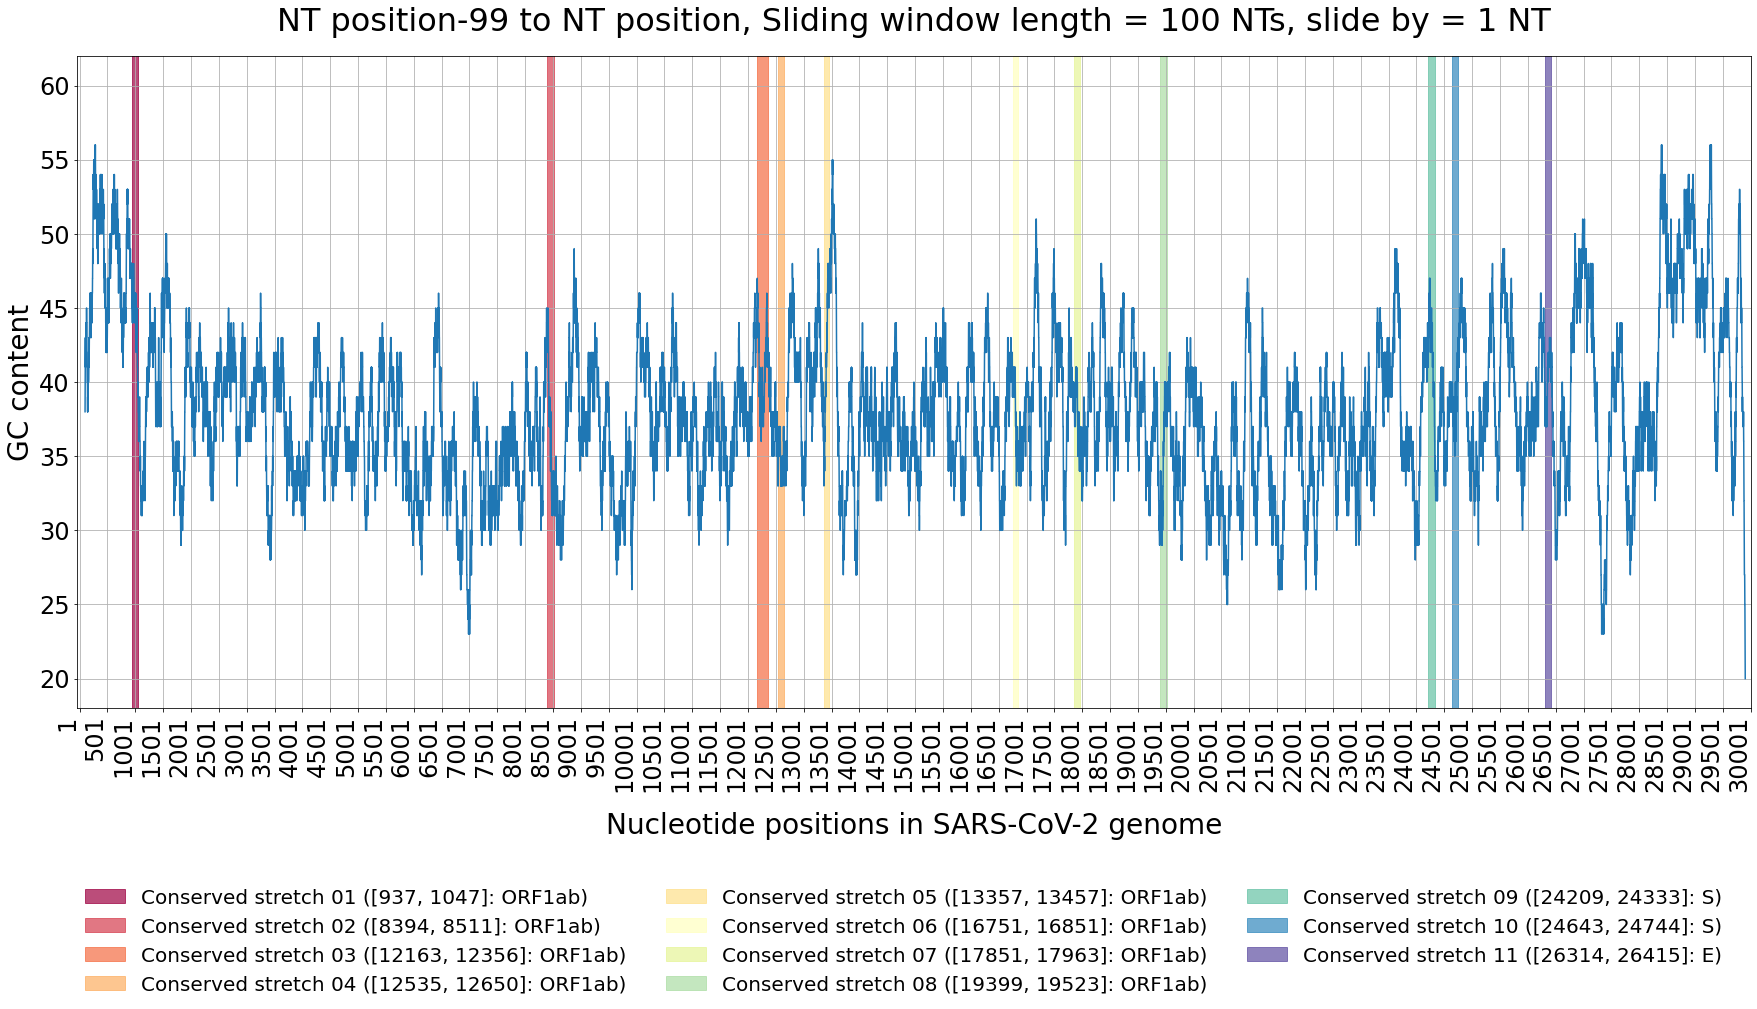

In [28]:
df_swan1 = pd.DataFrame({"nt_pos": range(1, len(ref_seq) + 1), "nt": list(ref_seq)})

df_swan2 = pd.DataFrame(
    {
        "nt_pos": [i + 1 for i in range(99, len(ref_seq))],
        "win_seq": [ref_seq[i - 99 : i + 1] for i in range(99, len(ref_seq))],
    }
)

df_swan = pd.merge(df_swan1, df_swan2, how="outer", on="nt_pos")
del df_swan1, df_swan2

print(
    sum(df_swan["nt_pos"].isnull()),
    sum(df_swan["nt"].isnull()),
    sum(df_swan["win_seq"].isnull()),
)

df_swan = df_swan.assign(gc_content=np.NaN)

win_len = 100

for row in df_swan.itertuples():
    if type(row.win_seq) == str:
        df_swan.at[row.Index, 'gc_content'] = GC(row.win_seq)
    
print(df_swan)

# ---------------------------------------------------------------

fig, ax = plt.subplots(figsize=(30,12), facecolor=(1, 1, 1))
# plt.style.use('fivethirtyeight')
ax.grid(True)

ax.plot(df_swan['nt_pos'], df_swan['gc_content'])

ax.set_title(r"NT position-99 to NT position, Sliding window length = 100 NTs, slide by = 1 NT", fontsize=32, pad=25)
ax.set_ylabel(f"GC content", fontsize=28)
ax.set_xlabel("Nucleotide positions in SARS-CoV-2 genome", fontsize=28, labelpad=20)

ax.set_xticks(
    np.arange(
        min(df_swan.nt_pos),
        max(df_swan.nt_pos) + 501,
        500,
    ),
    rotation=90,
    fontsize=24,
)
    
ax.set_xlim(-50, 30001)
ax.set_ylim(18, 62)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", fontsize=24)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=24)

my_cmap = cm.get_cmap("Spectral", len(df_table_02))
patches_list = list()

for row in df_table_02.itertuples():
    patches_list.append(
        mpatches.Rectangle(
            (row._2, 0),
            row._4,
            100,
            fill=True,
            color=my_cmap(range(len(df_table_02)))[row.Index],
            alpha=0.7,
            linewidth=1,
            label=f"{row._1} ([{row._2}, {row._3}]: {row.Gene})",
        )
    )
    ax.add_patch(patches_list[-1])

ax.legend(
    handles=patches_list,
    loc=(0.0, -0.45),
    fontsize=20,
    frameon=False,
    mode=None,
    ncol=3,
    labelspacing=0.5,
    edgecolor="black",
)

### NT position to NT position + 99

0 0 99
       nt_pos nt                                            win_seq  \
0           1  A  ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...   
1           2  T  TTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGAT...   
2           3  T  TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...   
3           4  A  AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...   
4           5  A  AAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC...   
...       ... ..                                                ...   
29898   29899  A                                                NaN   
29899   29900  A                                                NaN   
29900   29901  A                                                NaN   
29901   29902  A                                                NaN   
29902   29903  A                                                NaN   

       gc_content  
0            38.0  
1            39.0  
2            40.0  
3            41.0  
4            41.0  
...           ...  


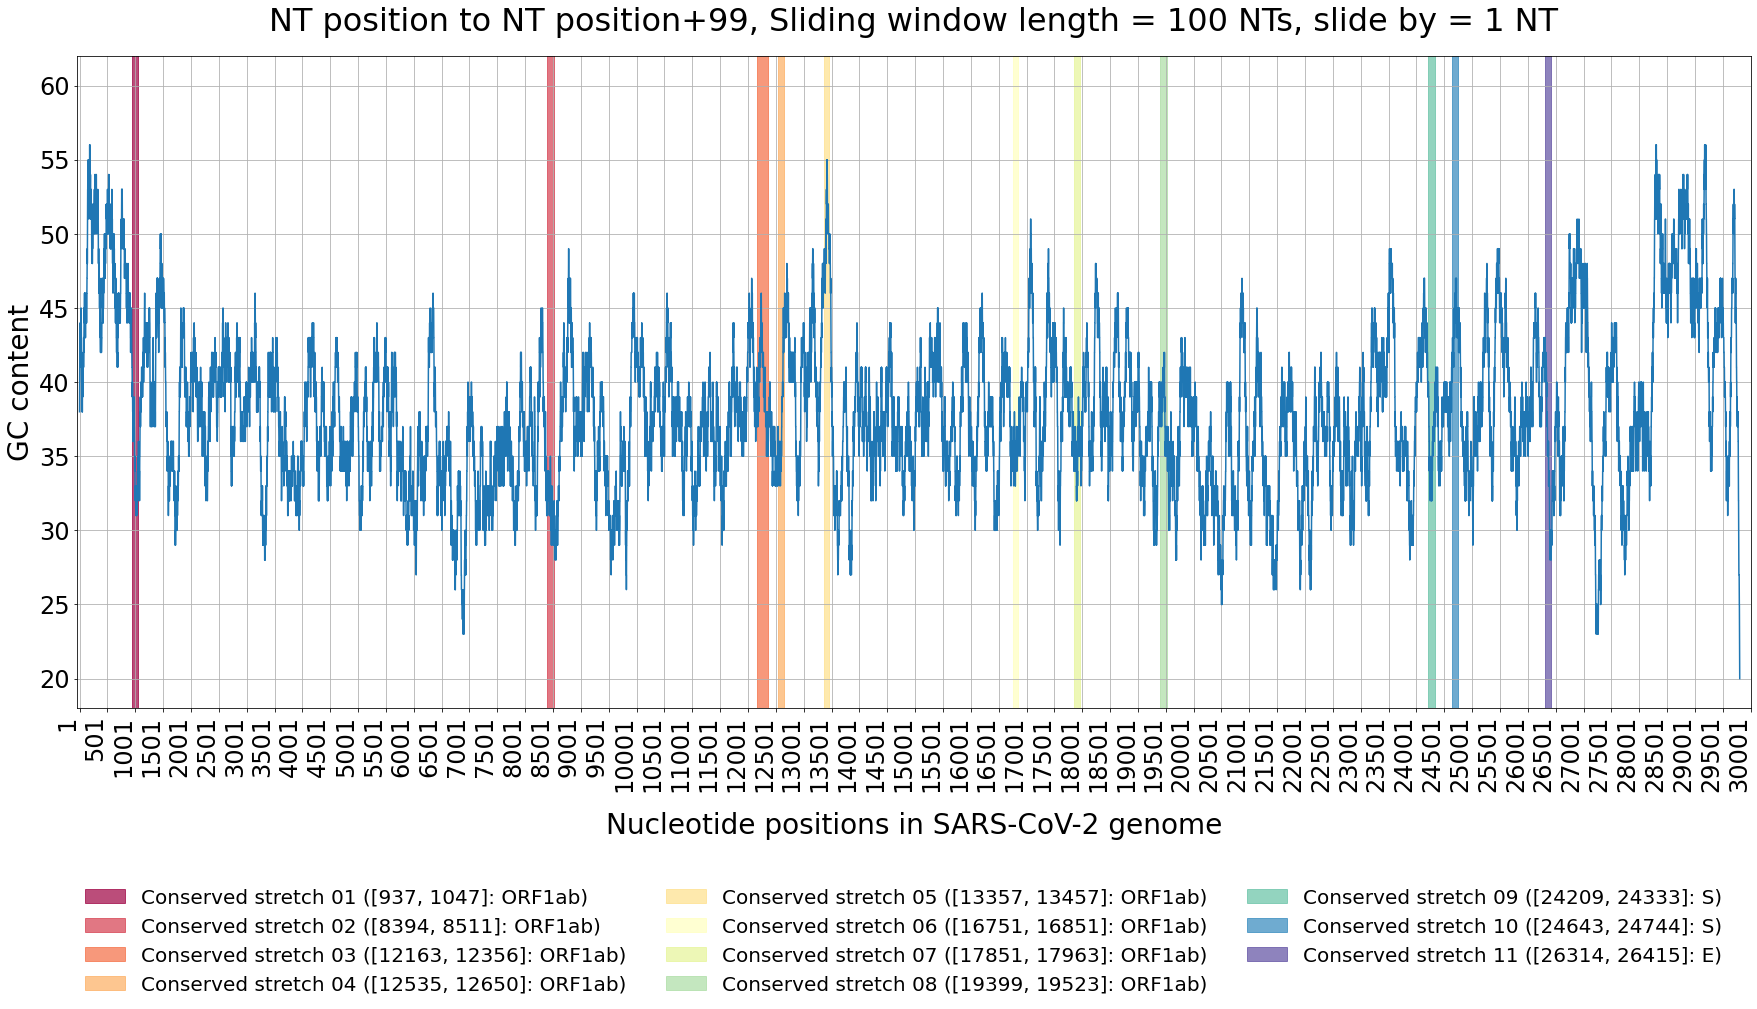

In [29]:
df_swan1 = pd.DataFrame({"nt_pos": range(1, len(ref_seq) + 1), "nt": list(ref_seq)})

df_swan2 = pd.DataFrame(
    {
        "nt_pos": [i + 1 for i in range(len(ref_seq)-99)],
        "win_seq": [ref_seq[i : i + 100] for i in range(len(ref_seq)-99)],
    }
)

df_swan = pd.merge(df_swan1, df_swan2, how="outer", on="nt_pos")
del df_swan1, df_swan2

print(
    sum(df_swan["nt_pos"].isnull()),
    sum(df_swan["nt"].isnull()),
    sum(df_swan["win_seq"].isnull()),
)

df_swan = df_swan.assign(gc_content=np.NaN)

win_len = 100

for row in df_swan.itertuples():
    if type(row.win_seq) == str:
        df_swan.at[row.Index, 'gc_content'] = GC(row.win_seq)
    
print(df_swan)

# ---------------------------------------------------------------

fig, ax = plt.subplots(figsize=(30,12), facecolor=(1, 1, 1))
# plt.style.use('fivethirtyeight')
ax.grid(True)

ax.plot(df_swan['nt_pos'], df_swan['gc_content'])

ax.set_title(r"NT position to NT position+99, Sliding window length = 100 NTs, slide by = 1 NT", fontsize=32, pad=25)
ax.set_ylabel(f"GC content", fontsize=28)
ax.set_xlabel("Nucleotide positions in SARS-CoV-2 genome", fontsize=28, labelpad=20)

ax.set_xticks(
    np.arange(
        min(df_swan.nt_pos),
        max(df_swan.nt_pos) + 501,
        500,
    ),
    rotation=90,
    fontsize=24,
)
    
ax.set_xlim(-50, 30001)
ax.set_ylim(18, 62)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", fontsize=24)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=24)

my_cmap = cm.get_cmap("Spectral", len(df_table_02))
patches_list = list()

for row in df_table_02.itertuples():
    patches_list.append(
        mpatches.Rectangle(
            (row._2, 0),
            row._4,
            100,
            fill=True,
            color=my_cmap(range(len(df_table_02)))[row.Index],
            alpha=0.7,
            linewidth=1,
            label=f"{row._1} ([{row._2}, {row._3}]: {row.Gene})",
        )
    )
    ax.add_patch(patches_list[-1])

ax.legend(
    handles=patches_list,
    loc=(0.0, -0.45),
    fontsize=20,
    frameon=False,
    mode=None,
    ncol=3,
    labelspacing=0.5,
    edgecolor="black",
)

### NT position - 50 to NT position + 49

0 0 99
       nt_pos nt win_seq  gc_content
0           1  A     NaN         NaN
1           2  T     NaN         NaN
2           3  T     NaN         NaN
3           4  A     NaN         NaN
4           5  A     NaN         NaN
...       ... ..     ...         ...
29898   29899  A     NaN         NaN
29899   29900  A     NaN         NaN
29900   29901  A     NaN         NaN
29901   29902  A     NaN         NaN
29902   29903  A     NaN         NaN

[29903 rows x 4 columns]


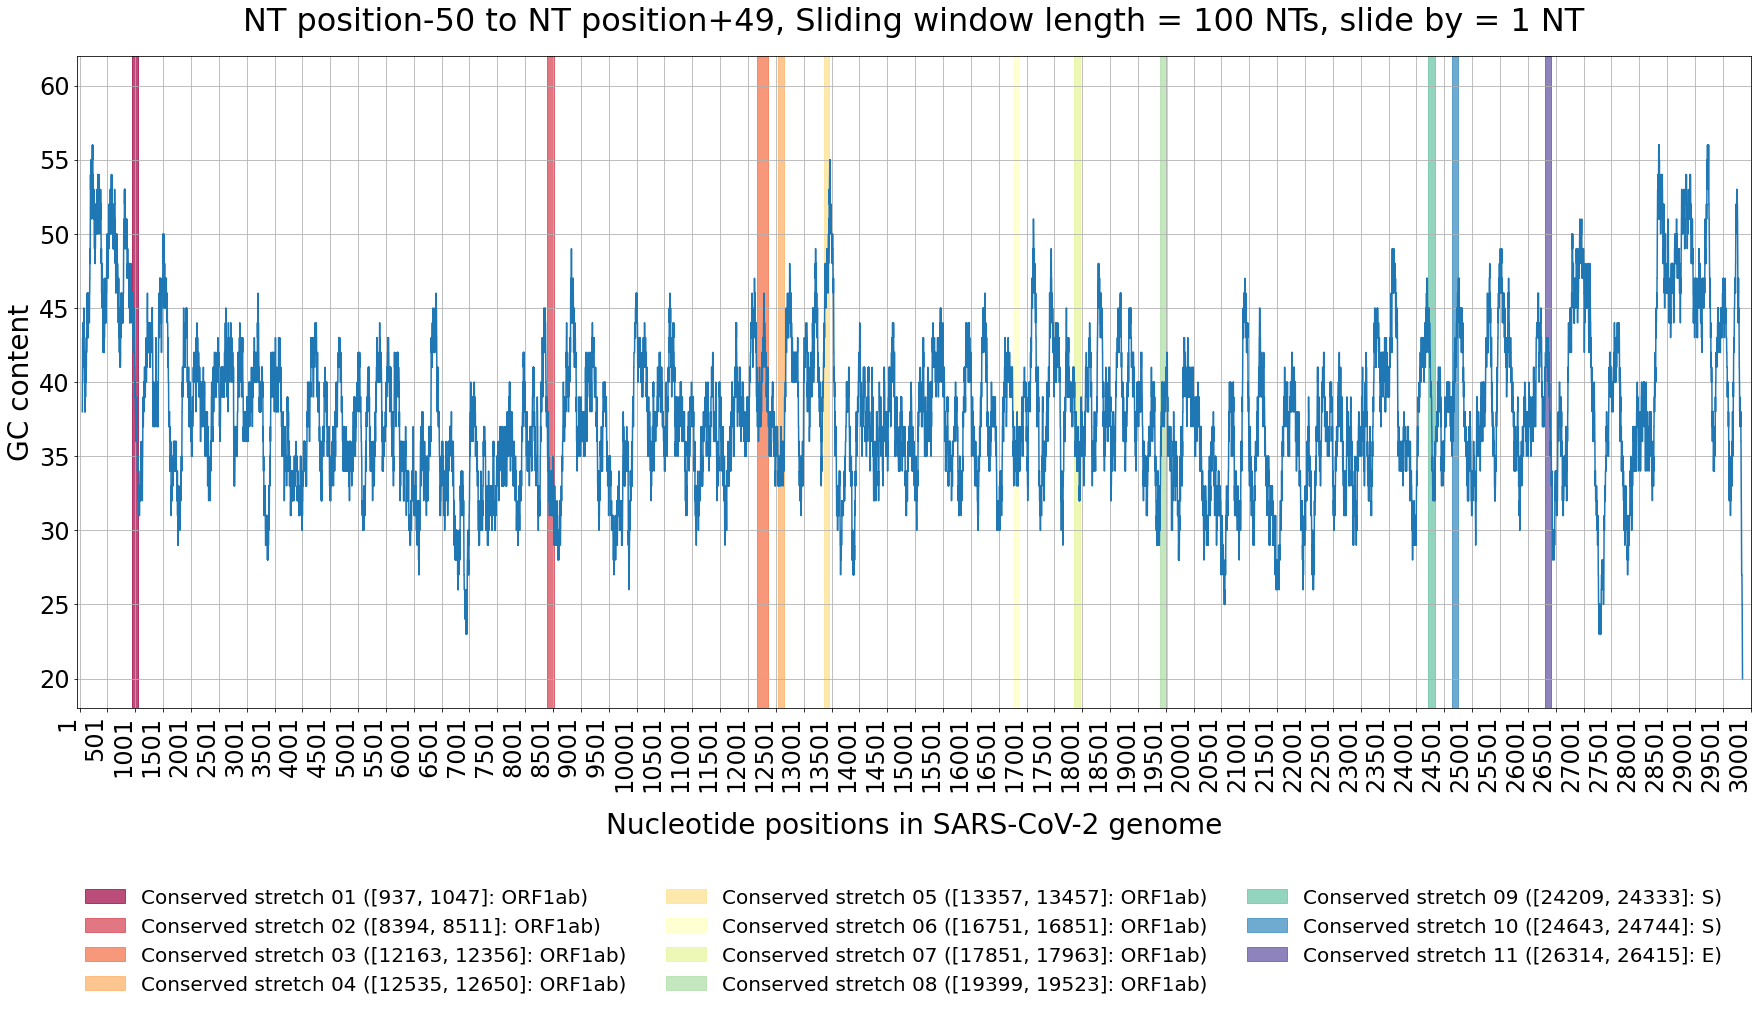

In [30]:
df_swan1 = pd.DataFrame({"nt_pos": range(1, len(ref_seq) + 1), "nt": list(ref_seq)})

df_swan2 = pd.DataFrame(
    {
        "nt_pos": [i + 1 for i in range(50, len(ref_seq)-49)],
        "win_seq": [ref_seq[i-50 : i + 50] for i in range(50, len(ref_seq)-49)],
    }
)

df_swan = pd.merge(df_swan1, df_swan2, how="outer", on="nt_pos")
del df_swan1, df_swan2

print(
    sum(df_swan["nt_pos"].isnull()),
    sum(df_swan["nt"].isnull()),
    sum(df_swan["win_seq"].isnull()),
)

df_swan = df_swan.assign(gc_content=np.NaN)

win_len = 100

for row in df_swan.itertuples():
    if type(row.win_seq) == str:
        df_swan.at[row.Index, 'gc_content'] = GC(row.win_seq)
    
print(df_swan)

# ---------------------------------------------------------------

fig, ax = plt.subplots(figsize=(30,12), facecolor=(1, 1, 1))
# plt.style.use('fivethirtyeight')
ax.grid(True)

ax.plot(df_swan['nt_pos'], df_swan['gc_content'])

ax.set_title(r"NT position-50 to NT position+49, Sliding window length = 100 NTs, slide by = 1 NT", fontsize=32, pad=25)
ax.set_ylabel(f"GC content", fontsize=28)
ax.set_xlabel("Nucleotide positions in SARS-CoV-2 genome", fontsize=28, labelpad=20)

ax.set_xticks(
    np.arange(
        min(df_swan.nt_pos),
        max(df_swan.nt_pos) + 501,
        500,
    ),
    rotation=90,
    fontsize=24,
)
    
ax.set_xlim(-50, 30001)
ax.set_ylim(18, 62)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", fontsize=24)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=24)

my_cmap = cm.get_cmap("Spectral", len(df_table_02))
patches_list = list()

for row in df_table_02.itertuples():
    patches_list.append(
        mpatches.Rectangle(
            (row._2, 0),
            row._4,
            100,
            fill=True,
            color=my_cmap(range(len(df_table_02)))[row.Index],
            alpha=0.7,
            linewidth=1,
            label=f"{row._1} ([{row._2}, {row._3}]: {row.Gene})",
        )
    )
    ax.add_patch(patches_list[-1])

ax.legend(
    handles=patches_list,
    loc=(0.0, -0.45),
    fontsize=20,
    frameon=False,
    mode=None,
    ncol=3,
    labelspacing=0.5,
    edgecolor="black",
)

## Well-determined regions in ORF1ab region, Molecular Cell paper related work

Used [$tabula-py$](https://chezo.uno/blog/2017-01-09_tabula-py--extract-table-from-pdf-into-python-dataframe-6c7acfa5f302/) to extract table from pdf to .ipynb as a pandas dataframe. 

Alternative is [$Camelot$](https://camelot-py.readthedocs.io/en/master/index.html) which claims to give superior resuts than $tabula-py$ and is more customizable. For my case, $camelot$'s default parameters gave the same result as the tweaked $tabula-py$, hence, I sticked with $tabula-py$.

In [31]:
# import camelot


# df_camelot = camelot.read_pdf(
#     "../other_data_files/pmid_33444546_supplementary_file.pdf", pages="5"
# )[0].df
# df_camelot.iat[0,6] = df_camelot.iat[0,6].replace('\n', ' ')
# df_camelot = df_camelot.rename(columns=df_camelot.iloc[0])\
#                        .drop(df_camelot.index[0])\
#                        .reset_index(drop=True)

In [32]:
[df_mol_cell_supp] = tabula.read_pdf(
    "../other_data_files/pmid_33444546_supplementary_file.pdf",
    lattice=True,
    pages="5",
    pandas_options={"header": [0, 1]},
)

df_mol_cell_supp.iat[0,6] = df_mol_cell_supp.iat[0,6].replace('\r', ' ')

df_mol_cell_supp = df_mol_cell_supp.rename(columns=df_mol_cell_supp.iloc[0])\
                                   .drop(df_mol_cell_supp.index[0])\
                                   .reset_index(drop=True)

df_mol_cell_supp["Region"] = np.int64(df_mol_cell_supp["Region"])
df_mol_cell_supp["Window"] = np.int64(df_mol_cell_supp["Window"])
df_mol_cell_supp["Start"] = np.int64(df_mol_cell_supp["Start"])
df_mol_cell_supp["End"] = np.int64(df_mol_cell_supp["End"])
df_mol_cell_supp["Size"] = np.int64(df_mol_cell_supp["Size"])
df_mol_cell_supp["Protein Domain"] = df_mol_cell_supp["Protein Domain"].astype("string")
df_mol_cell_supp["Median Shannon Entropy"] = np.float64(
    df_mol_cell_supp["Median Shannon Entropy"]
)

df_mol_cell_supp

,Region,Window,Start,End,Size,Protein Domain,Median Shannon Entropy
0,1,1,1,622,622,"5'UTR, Nsp1",0.000077
1,2,1,944,1026,83,Nsp2,0.000002
2,3,1,1478,1572,95,Nsp2,0.026200
3,4,1,1968,2188,221,Nsp2,0.000507
4,5,1,2682,2800,119,"Nsp2, Nsp3",0.009190
5,6,1,3416,3597,182,Nsp3,0.000052
6,7,1,4169,4232,64,Nsp3,0.000003
7,8,1,4471,4713,243,Nsp3,0.000482
8,9,1,4791,5162,372,Nsp3,0.000455
9,10,1,5693,6013,321,Nsp3,0.002070


In [60]:
# df_table_02 = df_table_02.assign(percentage_overlap_with_well_determined_regions=0)
df_table_02 = df_table_02.assign(well_determined_region_names=None)

for row_t in df_table_02.itertuples():
    # cs_i, cs_f, cs_len = row_t._2, row_t._3, row_t._4
    i_t = pd.Interval(row_t._2, row_t._3, closed="both")
    wd_regions = ""
    for row_s in df_mol_cell_supp.itertuples():
        i_s = pd.Interval(row_s.Start, row_s.End, closed="both")
        overlap_len = 0
        if i_t.overlaps(i_s):
            print(row_s._6, wd_regions)
            for i in range(row_s.Start, row_s.End + 1):
                if i in i_t:
                    overlap_len += 1
            per_overlap = 100 * (overlap_len / row_t._4)
            wd_regions += f"Region {row_s.Region} ({row_s._6}; {per_overlap:.2f}%),"
    if wd_regions:
        df_table_02.at[row_t.Index, "well_determined_region_names"] = wd_regions[:-1]

# df_table_02.to_excel(
#     "../Supplementary_files/Table_02.xlsx",
#     index=False,
#     sheet_name="overlap with PMID- 33444546",
#     header=True,
# )
df_table_02

Nsp2 
Nsp3 
Nsp8, Nsp9 
Nsp8, Nsp9 
Nsp13 
Nsp14 


,Conserved stretches' serial number,Nucleotide start position,Nucleotide end position,Conserved stretch length,Gene,well_determined_region_names
0,Conserved stretch 01,937,1047,111,ORF1ab,Region 2 (Nsp2; 74.77%)
1,Conserved stretch 02,8394,8511,118,ORF1ab,Region 16 (Nsp3; 100.00%)
2,Conserved stretch 03,12163,12356,194,ORF1ab,"Region 25 (Nsp8, Nsp9; 65.46%)"
3,Conserved stretch 04,12535,12650,116,ORF1ab,"Region 25 (Nsp8, Nsp9; 100.00%)"
4,Conserved stretch 05,13357,13457,101,ORF1ab,None
5,Conserved stretch 06,16751,16851,101,ORF1ab,None
6,Conserved stretch 07,17851,17963,113,ORF1ab,Region 36 (Nsp13; 75.22%)
7,Conserved stretch 08,19399,19523,125,ORF1ab,Region 37 (Nsp14; 100.00%)
8,Conserved stretch 09,24209,24333,125,S,None
9,Conserved stretch 10,24643,24744,102,S,None


# Saving the files

## Supplementary Table 04

In [34]:
## We're saving an updated version of this table later below

# # Saving df
# df.to_excel(
#     '../Supplementary_files/Supplementary_Table_04.xlsx',
#     index=True,
#     sheet_name='Comparison with other CoVs',
#     header=True
# )

# Showing only desirable columns
df.set_index("seq_description").iloc[
    :,
    list(
        range(
            -1 + 2 + len(conserved_stretch_info_list),
            -1 + 2 + len(conserved_stretch_info_list) * 2,
        )
    ),
]

,match_score_for_conserved_stretch_01,match_score_for_conserved_stretch_02,match_score_for_conserved_stretch_03,match_score_for_conserved_stretch_04,match_score_for_conserved_stretch_05,match_score_for_conserved_stretch_06,match_score_for_conserved_stretch_07,match_score_for_conserved_stretch_08,match_score_for_conserved_stretch_09,match_score_for_conserved_stretch_10,match_score_for_conserved_stretch_11
seq_description,,,,,,,,,,,
"MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome",100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000
"NC_006577.2 Human coronavirus HKU1, complete genome",20.863309,45.762712,58.375635,47.107438,45.192308,65.346535,73.451327,57.6,56.8,60.784314,41.176471
"NC_005147.1 Human coronavirus OC43, complete genome",20.143885,39.830508,58.883249,44.628099,42.307692,68.316832,71.681416,62.4,53.6,57.843137,40.196078
"NC_038294.1 Betacoronavirus England 1 isolate H123990006, complete genome",34.532374,51.694915,64.974619,57.024793,50.000000,76.237624,68.141593,66.4,60.0,56.862745,47.058824
"NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome",34.532374,51.694915,64.974619,57.024793,50.000000,75.247525,68.141593,66.4,60.0,56.862745,47.058824
"NC_004718.3 SARS coronavirus Tor2, complete genome",84.172662,78.813559,92.893401,86.776860,89.423077,92.079208,84.955752,86.4,85.6,89.215686,93.137255
"NC_009021.1 Rousettus bat coronavirus HKU9, complete genome",30.935252,40.677966,65.482234,57.851240,56.730769,71.287129,69.911504,64.8,63.2,56.862745,39.215686
"NC_028909.1 BtPa-BetaCoV/GD2013, complete genome",35.971223,46.610169,61.421320,52.892562,51.923077,73.267327,65.486726,64.0,60.0,52.941176,50.980392
"OM009282.1 Pangolin coronavirus HKU4/P251T/pangolin/2018, complete genome",39.568345,46.610169,63.959391,55.371901,52.884615,76.237624,69.026549,64.8,60.8,58.823529,54.901961


## Batch file (input for MXfold2)

Preparing an input file (with RNA sequences of SARS-CoV-2 conserved stretches) for MXfold2 in order to generate their secondary structures.

In [35]:
with open("../seq_data_files/output_files/batch_seq_input.fasta", "w") as file:
    for row in df.itertuples():
        j = 0
        for i in range(3, 3 + len(conserved_stretch_info_list)):
            temp_seq = row[i].replace("T", "U").replace("-", "")
            file.write(
                f"> conserved_stretch_{j+1:02} | {row.seq_description}\n{temp_seq}\n"
            )
            j += 1

## Supplementary Table 05 (NT based stats for Conserved stretches)

In [36]:
df_ref = pd.DataFrame(df.iloc[0]).rename(columns={0: "seq"}).iloc[2:13]
df_ref = df_ref.assign(
    count_inserts=lambda x: x.seq.str.count("-"),
    percent_A=lambda x: 100 * (x.seq.str.count("A") / x.seq.str.len()),
    adj_percent_A=lambda x: 100
    * (x.seq.str.count("A") / (x.seq.str.len() - x.seq.str.count("-"))),
    percent_C=lambda x: 100 * (x.seq.str.count("C") / x.seq.str.len()),
    adj_percent_C=lambda x: 100
    * (x.seq.str.count("C") / (x.seq.str.len() - x.seq.str.count("-"))),
    percent_G=lambda x: 100 * (x.seq.str.count("G") / x.seq.str.len()),
    adj_percent_G=lambda x: 100
    * (x.seq.str.count("G") / (x.seq.str.len() - x.seq.str.count("-"))),
    percent_T=lambda x: 100 * (x.seq.str.count("T") / x.seq.str.len()),
    adj_percent_T=lambda x: 100
    * (x.seq.str.count("T") / (x.seq.str.len() - x.seq.str.count("-"))),
    count_CG=lambda x: x.seq.str.count("CG"),
    percent_CG=lambda x: 100 * (x.seq.str.count("CG") / x.seq.str.len()),
    adj_percent_CG=lambda x: 100
    * (x.seq.str.count("CG") / (x.seq.str.len() - x.seq.str.count("-"))),
    ObyE_CG=lambda x: (x.seq.str.count("CG") * x.seq.str.len())
    / (x.seq.str.count("C") * x.seq.str.count("G")),
    adj_ObyE_CG=lambda x: (
        x.seq.str.count("CG") * (x.seq.str.len() - x.seq.str.count("-"))
    )
    / (x.seq.str.count("C") * x.seq.str.count("G")),
)

# df_ref.rename(
#     columns={
#         "seq": "NT sequence",
#         "count_inserts": "Number of inserts",
#         "percent_A": "Percentage of A",
#         "adj_percent_A": "Adjusted percentage of A",
#         "percent_C": "Percentage of C",
#         "adj_percent_C": "Adjusted percentage of C",
#         "percent_G": "Percentage of G",
#         "adj_percent_G": "Adjusted percentage of G",
#         "percent_T": "Percentage of T",
#         "adj_percent_T": "Adjusted percentage of T",
#         "count_CG": "Number of CpGs",
#         "percent_CG": "Percentage of CpGs",
#         "adj_percent_CG": "Adjusted percentage of CpGs",
#         "ObyE_CG": "CpGs O/E",
#         "adj_ObyE_CG": "Adjusted CpGs O/E",
#     }
# ).to_excel(
#     "../Supplementary_files/Supplementary_Table_05.xlsx",
#     index=True,
#     sheet_name="Conserved stretch NT stats",
#     header=True,
# )

df_ref

,seq,count_inserts,percent_A,adj_percent_A,percent_C,adj_percent_C,percent_G,adj_percent_G,percent_T,adj_percent_T,count_CG,percent_CG,adj_percent_CG,ObyE_CG,adj_ObyE_CG
conserved_stretch_01,TAAGAGGGGTGTATACTGCTGCCGTGAACATGA-------------...,28,26.618705,33.333333,12.230216,15.315315,20.143885,25.225225,20.863309,26.126126,3,2.158273,2.702703,0.876050,0.699580
conserved_stretch_02,CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACT...,0,37.288136,37.288136,16.949153,16.949153,16.101695,16.101695,29.661017,29.661017,3,2.542373,2.542373,0.931579,0.931579
conserved_stretch_03,GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTG...,3,31.979695,32.474227,14.213198,14.432990,25.888325,26.288660,26.395939,26.804124,2,1.015228,1.030928,0.275910,0.271709
conserved_stretch_04,TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGAT...,5,31.404959,32.758621,14.049587,14.655172,19.008264,19.827586,31.404959,32.758621,0,0.000000,0.000000,0.000000,0.000000
conserved_stretch_05,ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTAT...,3,25.961538,26.732673,22.115385,22.772277,23.076923,23.762376,25.961538,26.732673,4,3.846154,3.960396,0.753623,0.731884
conserved_stretch_06,CTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGT...,0,38.613861,38.613861,17.821782,17.821782,16.831683,16.831683,26.732673,26.732673,2,1.980198,1.980198,0.660131,0.660131
conserved_stretch_07,TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTC...,0,36.283186,36.283186,19.469027,19.469027,14.159292,14.159292,30.088496,30.088496,0,0.000000,0.000000,0.000000,0.000000
conserved_stretch_08,TCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAA...,0,30.400000,30.400000,16.000000,16.000000,21.600000,21.600000,32.000000,32.000000,2,1.600000,1.600000,0.462963,0.462963
conserved_stretch_09,ACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCAT...,0,28.000000,28.000000,16.000000,16.000000,22.400000,22.400000,33.600000,33.600000,0,0.000000,0.000000,0.000000,0.000000
conserved_stretch_10,TAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTT...,0,27.450980,27.450980,17.647059,17.647059,22.549020,22.549020,32.352941,32.352941,0,0.000000,0.000000,0.000000,0.000000


## Supplementary Table 06 (ZAP-binding motifs counts, for m=4/5/6/7/8)

In [37]:
def zap_n_motif_constructor(m):
    """Constructs the pattern for ZAP-binding motif given n
    Input: m is the m in C(n_{m})G(n)CG, where m = 4/5/6/7/8
    Returns the raw string for the desired ZAP-binding motif 
    """
    zap_motif = r"[cC]-*"
    for i in range(m):
        zap_motif = zap_motif + r"[aAtTcCgG]-*"
    return zap_motif + r"[gG]-*[aAtTcCgG]-*[cC]-*[gG]"

In [38]:
df_zap = pd.DataFrame(df.iloc[0]).rename(columns={0: "seq"}).iloc[2:13]
df_zap = df_zap.assign(
    zap_4_motif_count=lambda x: x.seq.str.count(rf"{zap_n_motif_constructor(4)}"),
    zap_5_motif_count=lambda x: x.seq.str.count(rf"{zap_n_motif_constructor(5)}"),
    zap_6_motif_count=lambda x: x.seq.str.count(rf"{zap_n_motif_constructor(6)}"),
    zap_7_motif_count=lambda x: x.seq.str.count(rf"{zap_n_motif_constructor(7)}"),
    zap_8_motif_count=lambda x: x.seq.str.count(rf"{zap_n_motif_constructor(8)}"),
)

# df_zap.rename(
#     columns={
#         "NT Sequence",
#         "Count of ZAP-binding motifs (m=4)",
#         "Count of ZAP-binding motifs (m=5)",
#         "Count of ZAP-binding motifs (m=6)",
#         "Count of ZAP-binding motifs (m=7)",
#         "Count of ZAP-binding motifs (m=8)",
#     }
# )

# df_zap.to_excel(
#     "../Supplementary_files/Supplementary_Table_06.xlsx",
#     index=True,
#     sheet_name="Count of ZAP-binding motifs",
#     header=True,
# )

df_zap

,seq,zap_4_motif_count,zap_5_motif_count,zap_6_motif_count,zap_7_motif_count,zap_8_motif_count
conserved_stretch_01,TAAGAGGGGTGTATACTGCTGCCGTGAACATGA-------------...,1,0,0,0,0
conserved_stretch_02,CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACT...,0,0,0,0,0
conserved_stretch_03,GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTG...,0,0,0,0,0
conserved_stretch_04,TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGAT...,0,0,0,0,0
conserved_stretch_05,ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTAT...,0,0,0,0,0
conserved_stretch_06,CTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGT...,0,0,0,0,0
conserved_stretch_07,TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTC...,0,0,0,0,0
conserved_stretch_08,TCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAA...,0,0,0,0,0
conserved_stretch_09,ACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCAT...,0,0,0,0,0
conserved_stretch_10,TAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTT...,0,0,0,0,0


In [39]:
# Verification using re module

df_zap_re = pd.DataFrame(df.iloc[0]).rename(columns={0: "seq"}).iloc[2:13]
df_zap_re = df_zap_re.assign(
    zap_4_motif_count=0,
    zap_5_motif_count=0,
    zap_6_motif_count=0,
    zap_7_motif_count=0,
    zap_8_motif_count=0,
)

for row in df_zap_re.itertuples():
    df_zap_re.at[row.Index, "zap_4_motif_count"] = len(
        [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(4)})", row.seq)]
    )
    df_zap_re.at[row.Index, "zap_5_motif_count"] = len(
        [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(5)})", row.seq)]
    )
    df_zap_re.at[row.Index, "zap_6_motif_count"] = len(
        [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(6)})", row.seq)]
    )
    df_zap_re.at[row.Index, "zap_7_motif_count"] = len(
        [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(7)})", row.seq)]
    )
    df_zap_re.at[row.Index, "zap_8_motif_count"] = len(
        [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(8)})", row.seq)]
    )

df_zap_re

,seq,zap_4_motif_count,zap_5_motif_count,zap_6_motif_count,zap_7_motif_count,zap_8_motif_count
conserved_stretch_01,TAAGAGGGGTGTATACTGCTGCCGTGAACATGA-------------...,1,0,0,0,0
conserved_stretch_02,CTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACT...,0,0,0,0,0
conserved_stretch_03,GGCTGTTGCTAATGGTGATTCTGAAGT---TGTTCTTAAAAAGTTG...,0,0,0,0,0
conserved_stretch_04,TTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGAT...,0,0,0,0,0
conserved_stretch_05,ACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTAT...,0,0,0,0,0
conserved_stretch_06,CTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGT...,0,0,0,0,0
conserved_stretch_07,TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTC...,0,0,0,0,0
conserved_stretch_08,TCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAA...,0,0,0,0,0
conserved_stretch_09,ACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCAT...,0,0,0,0,0
conserved_stretch_10,TAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTT...,0,0,0,0,0


In [40]:
df_zap.equals(df_zap_re)

True

# Data Analysis (contd.)

## cs vs ref_seq_without_cs: calculations for GC content, CpG O/E

In [41]:
conserved_stretch_length_list = list(df_table_02['Conserved stretch length'])
conserved_stretch_length_list

[111, 118, 194, 116, 101, 101, 113, 125, 125, 102, 102]

In [42]:
ref_seq_without_cs = ""
cs_seqs_combined = ""
total_cpgs_in_cs = 0
i = 0
pos_list = list(
    zip(
        list(df_table_02["Nucleotide start position"]),
        list(df_table_02["Nucleotide end position"]),
    )
)

for i in range(len(pos_list)):
    total_cpgs_in_cs += Seq(ref_seq[pos_list[i][0] - 1 : pos_list[i][1]]).count("CG")
    if i == 0:
        ref_seq_without_cs += ref_seq[: pos_list[i][0] - 1]
    elif i == len(conserved_stretch_length_list) - 1:
        ref_seq_without_cs += ref_seq[pos_list[i][1] :]
    else:
        pass
    cs_seqs_combined += ref_seq[pos_list[i][0] - 1 : pos_list[i][1]]
    if i < len(conserved_stretch_length_list) - 1:
        ref_seq_without_cs += ref_seq[pos_list[i][1] : pos_list[i + 1][0] - 1]

print(f'{total_cpgs_in_cs=}')
print(f'{GC(ref_seq)=}')
print(f'{GC(cs_seqs_combined)=}')
print(f'{GC(ref_seq_without_cs)=}')

total_cpgs_in_cs=20
GC(ref_seq)=37.97277865097148
GC(cs_seqs_combined)=38.30275229357798
GC(ref_seq_without_cs)=37.95768490994929


In [43]:
cs_len_total =  sum(conserved_stretch_length_list)

print(cs_len_total)
print(cs_len_total == len(cs_seqs_combined))

1308
True


In [44]:
print(len(ref_seq) - len(cs_seqs_combined) == len(ref_seq_without_cs))

True


In [45]:
cpg_o_by_e_ref_seq = (len(ref_seq) * Seq(ref_seq).count("CG")) / (
    Seq(ref_seq).count("C") * Seq(ref_seq).count("G")
)

print(f'{cpg_o_by_e_ref_seq=}')

cpg_o_by_e_cs_seqs_combined = (total_cpgs_in_cs * cs_len_total) / (
    Seq(cs_seqs_combined).count("C") * Seq(cs_seqs_combined).count("G")
)
print(f"{cpg_o_by_e_cs_seqs_combined=}")

cpg_o_by_e_ref_seq_without_cs = (
    (Seq(ref_seq).count("CG") - total_cpgs_in_cs) * len(ref_seq_without_cs)
) / (Seq(ref_seq_without_cs).count("C") * Seq(ref_seq_without_cs).count("G"))
print(f"{cpg_o_by_e_ref_seq_without_cs=}")

cpg_o_by_e_ref_seq=0.40768887286660366
cpg_o_by_e_cs_seqs_combined=0.421256038647343
cpg_o_by_e_ref_seq_without_cs=0.407157214109662


## Random sampling

In [46]:
def construct_non_overlapping_intervals(cs_len_list, start, end):
    """construct_non_overlapping_intervals_with_cs_lengths
    ...
    """
    interval_list = []
    for x, len_ in enumerate(cs_len_list):
        if not x:
            m = random.randint(start-1, end-len_)
            i_new = pd.Interval(m, m+len_-1, closed='both')
            interval_list.append(i_new)
        else:
            while True:
                m = random.randint(start-1, end-len_)
                i_new = pd.Interval(m, m+len_-1, closed='both')
                flag = True
                for i in interval_list:    
                    if i.overlaps(i_new):
                        flag = False
                        break
                    else:
                        pass
                if flag:
                    interval_list.append(i_new)
                    break
                        
    return interval_list
                    
                
        

In [47]:
def calculate_number_of_zap_motifs():
    """...
    ...
    """
    zap_motifs_found = 0
    count_stretches_geq1 = 0
    count_stretches_eq0 = 0
    count_stretches_gc_geq_ref = 0
    count_stretches_gc_lt_ref = 0
    count_stretches_cpgs_geq_ref = 0
    count_stretches_cpgs_lt_ref = 0
    count_stretches_cpgs = 0
    all_stretches_seqs = ""
    for x, i in enumerate(
        construct_non_overlapping_intervals(
            conserved_stretch_length_list, 1, LEN_REF_SEQ
        )
    ):
        seq_ = ref_seq[i.left : i.right + 1]
        if GC(seq_) >= GC(ref_seq):
            count_stretches_gc_geq_ref += 1
        else:
            count_stretches_gc_lt_ref += 1

        count_stretches_cpgs += Seq(seq_).count("CG")
        stretch_cpg_o_by_e = (Seq(seq_).count("CG") * len(seq_)) / (
            Seq(seq_).count("C") * Seq(seq_).count("G")
        )
        if stretch_cpg_o_by_e >= cpg_o_by_e_ref_seq:
            count_stretches_cpgs_geq_ref += 1
        else:
            count_stretches_cpgs_lt_ref += 1

        zap_motifs_found += len(
            [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(4)})", seq_)]
        )
        zap_motifs_found += len(
            [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(5)})", seq_)]
        )
        zap_motifs_found += len(
            [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(6)})", seq_)]
        )
        zap_motifs_found += len(
            [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(7)})", seq_)]
        )
        zap_motifs_found += len(
            [m.start() for m in re.finditer(rf"(?={zap_n_motif_constructor(8)})", seq_)]
        )
        if zap_motifs_found == 0:
            count_stretches_eq0 += 1
        else:
            count_stretches_geq1 += 1
        all_stretches_seqs += seq_

    return (
        zap_motifs_found,
        count_stretches_geq1,
        count_stretches_eq0,
        GC(all_stretches_seqs),
        count_stretches_gc_geq_ref,
        count_stretches_gc_lt_ref,
        count_stretches_cpgs_geq_ref,
        count_stretches_cpgs_lt_ref,
        (count_stretches_cpgs * cs_len_total)
        / (Seq(all_stretches_seqs).count("C") * Seq(all_stretches_seqs).count("G")),
    )

In [48]:
zap_motif_count_list = []
gc_content_list = []
cpg_o_by_e_list = []


def calculate_average_zap_motifs(seed_val, total_iterations=1000):
    """...
    ...
    cs length regions length, if ever taken,
    expected zap motifs is this
    """
    random.seed(seed_val)
    total_zap_motifs_found = 0
    cases = 0
    total_count_stretches_geq1 = 0
    total_count_stretches_eq0 = 0
    total_count_stretches_gc_geq_ref_iter = 0
    total_count_stretches_gc_lt_ref_iter = 0
    total_count_stretches_cpgs_geq_ref_iter = 0
    total_count_stretches_cpgs_lt_ref_iter = 0
    for _ in tqdm(range(total_iterations)):
        (
            zap_motifs_found_iter,
            count_stretches_geq1_iter,
            count_stretches_eq0_iter,
            gc_content_iter,
            count_stretches_gc_geq_ref_iter,
            count_stretches_gc_lt_ref_iter,
            count_stretches_cpgs_geq_ref_iter,
            count_stretches_cpgs_lt_ref_iter,
            count_stretches_cpg_o_by_e_iter,
        ) = calculate_number_of_zap_motifs()
        total_count_stretches_geq1 += count_stretches_geq1_iter
        total_count_stretches_eq0 += count_stretches_eq0_iter
        total_count_stretches_gc_geq_ref_iter += count_stretches_gc_geq_ref_iter
        total_count_stretches_gc_lt_ref_iter += count_stretches_gc_lt_ref_iter
        total_count_stretches_cpgs_geq_ref_iter += count_stretches_cpgs_geq_ref_iter
        total_count_stretches_cpgs_lt_ref_iter += count_stretches_cpgs_lt_ref_iter
        if zap_motifs_found_iter <= 1:
            cases += 1
        zap_motif_count_list.append(zap_motifs_found_iter)
        total_zap_motifs_found += zap_motifs_found_iter
        gc_content_list.append(gc_content_iter)
        cpg_o_by_e_list.append(count_stretches_cpg_o_by_e_iter)

    return {
        "mean_zap_motifs": np.mean(zap_motif_count_list),
        "iterations_with_zap_motifs_lt1": cases,
        "median_zap_motifs": np.median(zap_motif_count_list),
        "stretches_with_zap_motifs_geq1": total_count_stretches_geq1,
        "stretches_with_zap_motifs_eq0": total_count_stretches_eq0,
        "mean_gc_content": np.mean(gc_content_list),
        "median_gc_content": np.median(gc_content_list),
        "stretches_with_gc_geq_ref": total_count_stretches_gc_geq_ref_iter,
        "stretches_with_gc_lt_ref": total_count_stretches_gc_lt_ref_iter,
        "stretches_with_cpgs_geq_ref": total_count_stretches_cpgs_geq_ref_iter,
        "stretches_with_cpgs_lt_ref": total_count_stretches_cpgs_lt_ref_iter,
        "mean_cpg_o_by_e": np.mean(cpg_o_by_e_list),
        "median_cpg_o_by_e": np.median(cpg_o_by_e_list),
    }

In [49]:
# return (
#     (total_zap_motifs_found / total_iterations, cases),
#     np.median(zap_motif_count_list),
#     np.max(zap_motif_count_list),
#     total_count_stretches_geq1,
#     total_count_stretches_eq0,
#     np.mean(gc_content_list),
#     np.median(gc_content_list),
#     np.max(gc_content_list),
#     np.min(gc_content_list),
#     total_count_stretches_gGCref
# )

In [50]:
LEN_REF_SEQ = len(ref_seq)
print()
av_zap_motifs_count_seed_A = calculate_average_zap_motifs(1, total_iterations=10000)
print(f'{av_zap_motifs_count_seed_A=}')
print()
av_zap_motifs_count_seed_B = calculate_average_zap_motifs(7, total_iterations=10000)
print(f'{av_zap_motifs_count_seed_B=}')
print()
av_zap_motifs_count_seed_C = calculate_average_zap_motifs(96, total_iterations=10000)
print(f'{av_zap_motifs_count_seed_C=}')

100%|██████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 232.07it/s]


av_zap_motifs_count_seed_A={'mean_zap_motifs': 3.6163, 'iterations_with_zap_motifs_lt1': 2101, 'median_zap_motifs': 3.0, 'stretches_with_zap_motifs_geq1': 75271, 'stretches_with_zap_motifs_eq0': 34729, 'mean_gc_content': 38.0304128440367, 'median_gc_content': 37.99694189602447, 'stretches_with_gc_geq_ref': 51118, 'stretches_with_gc_lt_ref': 58882, 'stretches_with_cpgs_geq_ref': 43676, 'stretches_with_cpgs_lt_ref': 66324, 'mean_cpg_o_by_e': 0.401975019173318, 'median_cpg_o_by_e': 0.3971829192348846}



100%|██████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.63it/s]


av_zap_motifs_count_seed_B={'mean_zap_motifs': 3.61815, 'iterations_with_zap_motifs_lt1': 2096, 'median_zap_motifs': 3.0, 'stretches_with_zap_motifs_geq1': 75472, 'stretches_with_zap_motifs_eq0': 34528, 'mean_gc_content': 38.01757262996942, 'median_gc_content': 37.99694189602447, 'stretches_with_gc_geq_ref': 50798, 'stretches_with_gc_lt_ref': 59202, 'stretches_with_cpgs_geq_ref': 43602, 'stretches_with_cpgs_lt_ref': 66398, 'mean_cpg_o_by_e': 0.40101135346663686, 'median_cpg_o_by_e': 0.39640929769512673}



100%|██████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:33<00:00, 294.68it/s]

av_zap_motifs_count_seed_C={'mean_zap_motifs': 3.6047333333333333, 'iterations_with_zap_motifs_lt1': 2126, 'median_zap_motifs': 3.0, 'stretches_with_zap_motifs_geq1': 74568, 'stretches_with_zap_motifs_eq0': 35432, 'mean_gc_content': 38.013037716615706, 'median_gc_content': 37.99694189602447, 'stretches_with_gc_geq_ref': 50705, 'stretches_with_gc_lt_ref': 59295, 'stretches_with_cpgs_geq_ref': 43528, 'stretches_with_cpgs_lt_ref': 66472, 'mean_cpg_o_by_e': 0.4008405681952065, 'median_cpg_o_by_e': 0.39654593409854916}


In [51]:
# LEN_REF_SEQ = len(ref_seq)
# print()
# av_zap_motifs_count_seed_A = calculate_average_zap_motifs(1, total_iterations=1000000)
# print(f'{av_zap_motifs_count_seed_A=}')
# print()
# av_zap_motifs_count_seed_B = calculate_average_zap_motifs(7, total_iterations=1000000)
# print(f'{av_zap_motifs_count_seed_B=}')
# print()
# av_zap_motifs_count_seed_C = calculate_average_zap_motifs(96, total_iterations=1000000)
# print(f'{av_zap_motifs_count_seed_C=}')

In [52]:
np.mean(conserved_stretch_length_list)

118.9090909090909

## Statistical tests

In [53]:
temp_count_stretches_gc_geq_ref = 0
temp_count_stretches_gc_lt_ref = 0
temp_count_stretches_cpgs_geq_ref = 0
temp_count_stretches_cpgs_lt_ref = 0

for i in range(len(pos_list)):
    temp_cs_seq = ref_seq[pos_list[i][0] - 1 : pos_list[i][1]]
    if GC(temp_cs_seq) >= GC(ref_seq):
        temp_count_stretches_gc_geq_ref += 1
    else:
        temp_count_stretches_gc_lt_ref += 1

    temp_stretch_cpg_o_by_e = (Seq(temp_cs_seq).count("CG") * len(temp_cs_seq)) / (
        Seq(temp_cs_seq).count("C") * Seq(temp_cs_seq).count("G")
    )
    if temp_stretch_cpg_o_by_e >= cpg_o_by_e_ref_seq:
        temp_count_stretches_cpgs_geq_ref += 1
    else:
        temp_count_stretches_cpgs_lt_ref += 1


print(f'{temp_count_stretches_gc_geq_ref=}')
print(f'{temp_count_stretches_gc_lt_ref=}')
print(f'{temp_count_stretches_cpgs_geq_ref=}')
print(f'{temp_count_stretches_cpgs_lt_ref=}')

temp_count_stretches_gc_geq_ref=6
temp_count_stretches_gc_lt_ref=5
temp_count_stretches_cpgs_geq_ref=6
temp_count_stretches_cpgs_lt_ref=5


In [54]:
GC(ref_seq)

37.97277865097148

In [55]:
!python ./statistical_tests.py

## All 14 seqs check for ZAP-binding motifs count

In [56]:
for i in range(1, len(conserved_stretch_info_list)+1):
    df[f'cs_{i:02}_zap_motifs_count'] = 0

df['total_zap_count'] = 0

In [57]:
for row in df.itertuples():
    total_zap_count = 0
    for i in range(3, 3 + len(conserved_stretch_info_list)):
        seq_to_check = row[i].replace('-', '')
        zap_count = (
            len(
                [
                    m.start()
                    for m in re.finditer(rf"(?={zap_n_motif_constructor(4)})", seq_to_check)
                ]
            )
            + len(
                [
                    m.start()
                    for m in re.finditer(rf"(?={zap_n_motif_constructor(5)})", seq_to_check)
                ]
            )
            + len(
                [
                    m.start()
                    for m in re.finditer(rf"(?={zap_n_motif_constructor(6)})", seq_to_check)
                ]
            )
            + len(
                [
                    m.start()
                    for m in re.finditer(rf"(?={zap_n_motif_constructor(7)})", seq_to_check)
                ]
            )
            + len(
                [
                    m.start()
                    for m in re.finditer(rf"(?={zap_n_motif_constructor(8)})", seq_to_check)
                ]
            )
        )
        df.at[row.Index, f"cs_{i-2:02}_zap_motifs_count"] = zap_count
        total_zap_count += zap_count
    df.at[row.Index, "total_zap_count"] = total_zap_count

In [58]:
# df.to_excel(
#     "../Supplementary_files/Supplementary_Table_04.xlsx",
#     index=True,
#     sheet_name="Count of ZAP-binding motifs",
#     header=True,
# )

## Visualizations (contd.)

[Stack Overflow: How can I make a blank subplot in matplotlib?](https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib) for its use in gridspec purposes and more

Text(-0.24, 1, 'C.')

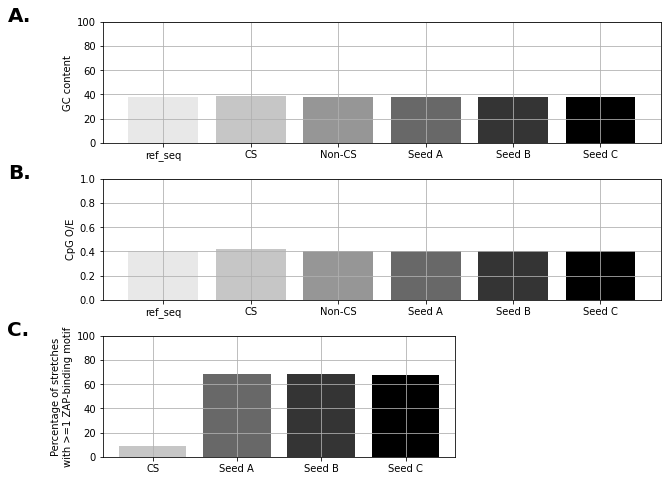

In [124]:
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(grid[0, 0:])
ax2 = fig.add_subplot(grid[1, 0:])
ax3 = fig.add_subplot(grid[2, :2])
ax4 = fig.add_subplot(grid[2, 2])

ax4.axis('off')


my_cmap = cm.get_cmap("Greys", 7)

ax1.bar(
    ["ref_seq", "CS", "Non-CS", "Seed A", "Seed B", "Seed C"],
    [
        GC(ref_seq),
        GC(cs_seqs_combined),
        GC(ref_seq_without_cs),
        av_zap_motifs_count_seed_A["mean_gc_content"],
        av_zap_motifs_count_seed_B["mean_gc_content"],
        av_zap_motifs_count_seed_C["mean_gc_content"],
    ],
    color=my_cmap(range(1, 7)),
)
ax1.set_ylim(0, 100)
ax1.grid(True)

ax1.set_ylabel("GC content")

# -----------------------------------------------------------------

ax2.bar(
    ["ref_seq", "CS", "Non-CS", "Seed A", "Seed B", "Seed C"],
    [
        cpg_o_by_e_ref_seq,
        cpg_o_by_e_cs_seqs_combined,
        cpg_o_by_e_ref_seq_without_cs,
        av_zap_motifs_count_seed_A["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_B["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_C["mean_cpg_o_by_e"],
    ],
    color=my_cmap(range(1, 7)),
)
ax2.set_ylim(0, 1)
ax2.grid(True)

ax2.set_ylabel("CpG O/E")
# ax1.text(0, 0, 'GC content', transform=fig.transFigure)

# -----------------------------------------------------------------

ax3.bar(
    ["CS", "Seed A", "Seed B", "Seed C"],
    [
        100 * (1 / (1 + 10)),
        100
        * (
            av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_A["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_B["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_C["stretches_with_zap_motifs_eq0"]
            )
        ),
    ],
    color=my_cmap([2, 4, 5, 6]),
)
ax3.set_ylim(0, 100)
ax3.grid(True)

ax3.set_ylabel("Percentage of stretches\nwith >=1 ZAP-binding motif")


ax1.text(
    0 - 0.15,
    1,
    r"A.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax1.transAxes,
)
ax2.text(
    0 - 0.15,
    1,
    r"B.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax2.transAxes,
)
ax3.text(
    0 - 0.15*3.2/2,
    1,
    r"C.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax3.transAxes,
)


# plt.subplots_adjust(wspace=0, hspace=0.5)

<Figure size 432x288 with 0 Axes>

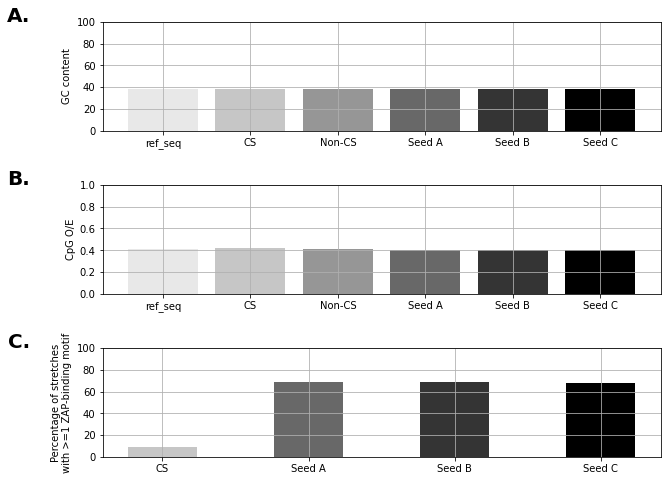

In [112]:
# plt.style.use('default')
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(10, 8), gridspec_kw={"height_ratios": [1, 1, 1]}
)

my_cmap = cm.get_cmap("Greys", 7)

ax1.bar(
    ["ref_seq", "CS", "Non-CS", "Seed A", "Seed B", "Seed C"],
    [
        GC(ref_seq),
        GC(cs_seqs_combined),
        GC(ref_seq_without_cs),
        av_zap_motifs_count_seed_A["mean_gc_content"],
        av_zap_motifs_count_seed_B["mean_gc_content"],
        av_zap_motifs_count_seed_C["mean_gc_content"],
    ],
    color=my_cmap(range(1, 7)),
)
ax1.set_ylim(0, 100)
ax1.grid(True)

ax1.set_ylabel("GC content")

# -----------------------------------------------------------------

ax2.bar(
    ["ref_seq", "CS", "Non-CS", "Seed A", "Seed B", "Seed C"],
    [
        cpg_o_by_e_ref_seq,
        cpg_o_by_e_cs_seqs_combined,
        cpg_o_by_e_ref_seq_without_cs,
        av_zap_motifs_count_seed_A["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_B["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_C["mean_cpg_o_by_e"],
    ],
    color=my_cmap(range(1, 7)),
)
ax2.set_ylim(0, 1)
ax2.grid(True)

ax2.set_ylabel("CpG O/E")
# ax1.text(0, 0, 'GC content', transform=fig.transFigure)

# -----------------------------------------------------------------

ax3.bar(
    ["CS", "Seed A", "Seed B", "Seed C"],
    [
        100 * (1 / (1 + 10)),
        100
        * (
            av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_A["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_B["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_C["stretches_with_zap_motifs_eq0"]
            )
        ),
    ],
    color=my_cmap([2, 4, 5, 6]),
    width=0.8 / 1.7,
)
ax3.set_ylim(0, 100)
ax3.grid(True)

ax3.set_ylabel("Percentage of stretches\nwith >=1 ZAP-binding motif")


ax1.text(
    0 - 0.15,
    1,
    r"A.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax1.transAxes,
)
ax2.text(
    0 - 0.15,
    1,
    r"B.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax2.transAxes,
)
ax3.text(
    0 - 0.15,
    1,
    r"C.",
    ha="center",
    va="baseline",
    rotation=0,
    color="black",
    size=20,
    fontweight="bold",
    transform=ax3.transAxes,
)

plt.subplots_adjust(wspace=0, hspace=0.5)

### GC content

Text(0.02, 0.5, 'GC content')

<Figure size 432x288 with 0 Axes>

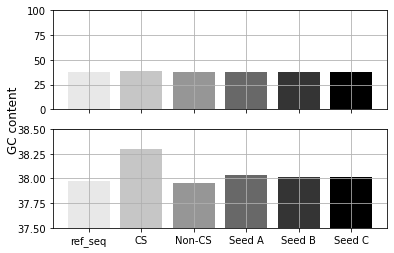

In [61]:
# plt.style.use('default')
plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

my_cmap = cm.get_cmap("Greys", 7)

ax1.bar(
    ['ref_seq', 'CS', 'Non-CS', 'Seed A', 'Seed B', 'Seed C'],
    [
        GC(ref_seq),
        GC(cs_seqs_combined),
        GC(ref_seq_without_cs),
        av_zap_motifs_count_seed_A["mean_gc_content"],
        av_zap_motifs_count_seed_B["mean_gc_content"],
        av_zap_motifs_count_seed_C["mean_gc_content"],
    ],
    color=my_cmap(range(1,7))
)
ax1.set_ylim(0,100)
ax1.grid(True)

ax2.bar(
    ['ref_seq', 'CS', 'Non-CS', 'Seed A', 'Seed B', 'Seed C'],
    [
        GC(ref_seq),
        GC(cs_seqs_combined),
        GC(ref_seq_without_cs),
        av_zap_motifs_count_seed_A["mean_gc_content"],
        av_zap_motifs_count_seed_B["mean_gc_content"],
        av_zap_motifs_count_seed_C["mean_gc_content"],
    ],
    color=my_cmap(range(1,7))
)
ax2.set_ylim(37.5, 38.5)
ax2.grid(True)

fig.supylabel('GC content')
# ax1.text(0, 0, 'GC content', transform=fig.transFigure)

Text(0, 0.5, 'GC content')

<Figure size 432x288 with 0 Axes>

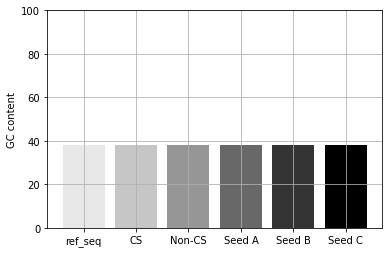

In [80]:
# plt.style.use('default')
plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1)

my_cmap = cm.get_cmap("Greys", 7)

ax.bar(
    ['ref_seq', 'CS', 'Non-CS', 'Seed A', 'Seed B', 'Seed C'],
    [
        GC(ref_seq),
        GC(cs_seqs_combined),
        GC(ref_seq_without_cs),
        av_zap_motifs_count_seed_A["mean_gc_content"],
        av_zap_motifs_count_seed_B["mean_gc_content"],
        av_zap_motifs_count_seed_C["mean_gc_content"],
    ],
    color=my_cmap(range(1,7))
)
ax.set_ylim(0,100)
ax.grid(True)

ax.set_ylabel('GC content')
# ax.text(0, 0, 'GC content', transform=fig.transFigure)

### ZAP-binding motifs

In [69]:
(
    av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
    + av_zap_motifs_count_seed_A["stretches_with_zap_motifs_eq0"]
) == 11 * (10 ** 4)

True

Text(0, 0.5, 'Percentage of Stretches with >=1 ZAP-binding motif')

<Figure size 432x288 with 0 Axes>

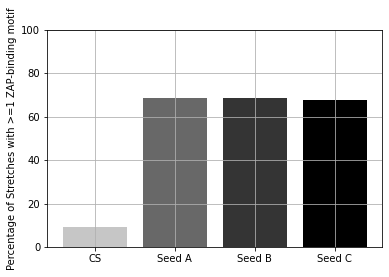

In [72]:
# plt.style.use('default')
plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1)

my_cmap = cm.get_cmap("Greys", 7)

ax.bar(
    ["CS", "Seed A", "Seed B", "Seed C"],
    [
        100 * (1 / (1 + 10)),
        100
        * (
            av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_A["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_A["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_B["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_B["stretches_with_zap_motifs_eq0"]
            )
        ),
        100
        * (
            av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
            / (
                av_zap_motifs_count_seed_C["stretches_with_zap_motifs_geq1"]
                + av_zap_motifs_count_seed_C["stretches_with_zap_motifs_eq0"]
            )
        ),
    ],
    color=my_cmap([2, 4, 5, 6]),
)
ax.set_ylim(0, 100)
ax.grid(True)

ax.set_ylabel("Percentage of Stretches with >=1 ZAP-binding motif")
# ax1.text(0, 0, 'GC content', transform=fig.transFigure)

### CpG O/E

Text(0.02, 0.5, 'CpG O/E')

<Figure size 432x288 with 0 Axes>

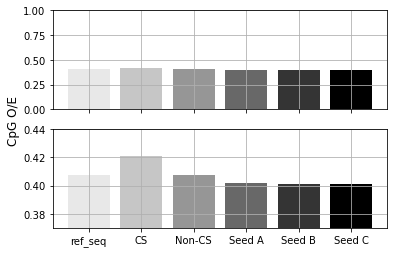

In [103]:
# plt.style.use('default')
plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

my_cmap = cm.get_cmap("Greys", 7)

ax1.bar(
    ['ref_seq', 'CS', 'Non-CS', 'Seed A', 'Seed B', 'Seed C'],
    [
        cpg_o_by_e_ref_seq,
        cpg_o_by_e_cs_seqs_combined,
        cpg_o_by_e_ref_seq_without_cs,
        av_zap_motifs_count_seed_A["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_B["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_C["mean_cpg_o_by_e"],
    ],
    color=my_cmap(range(1,7))
)
ax1.set_ylim(0,1)
ax1.grid(True)

ax2.bar(
    ['ref_seq', 'CS', 'Non-CS', 'Seed A', 'Seed B', 'Seed C'],
    [
        cpg_o_by_e_ref_seq,
        cpg_o_by_e_cs_seqs_combined,
        cpg_o_by_e_ref_seq_without_cs,
        av_zap_motifs_count_seed_A["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_B["mean_cpg_o_by_e"],
        av_zap_motifs_count_seed_C["mean_cpg_o_by_e"],
    ],
    color=my_cmap(range(1,7))
)
ax2.set_ylim(0.37, 0.44)
ax2.grid(True)

fig.supylabel('CpG O/E')
# ax1.text(0, 0, 'GC content', transform=fig.transFigure)